<a href="https://colab.research.google.com/github/tejareddytadi/cardio-vascular-diseases/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

importing the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ml_prjct/data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


data processing

In [ ]:
#detail information about the dataset using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

there are some null values in education ,cigs perday, bpmeds,totchol,bmi,heart rate,glucose

In [ ]:
print(data.isnull().sum())
print(data.isnull().sum().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
510


Imputation of missing values using mean for numerical and mode for categorical

In [ ]:
#filling NaN values with respect to the analysis


data['education'] = data['education'].fillna(data['education'].mean())
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean())
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])
data['totChol'] = data['totChol'].fillna(data['totChol'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].mean())
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())

In [ ]:
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
data['sex'].replace(['F','M'],[0,1], inplace=True)
data['is_smoking'].replace(['NO','YES'],[0,1], inplace=True)

In [ ]:
data = data.drop(['id', 'education'], axis=1)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Select columns with correlation greater than or equal to 0.15 with respect to "TenYearCHD"
selected_columns = correlation_matrix["TenYearCHD"] >= 0.15

# Filter the correlation matrix based on selected columns
filtered_data = correlation_matrix[selected_columns]
filtered_data

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.041882,-0.210997,-0.191956,0.122114,0.059038,0.308826,0.107875,0.272209,0.404845,0.221896,0.137645,-0.002595,0.111241,0.224927
prevalentHyp,0.308826,0.003072,-0.119325,-0.079093,0.256892,0.071652,1.000000,0.082565,0.158741,0.699285,0.612897,0.299723,0.150766,0.082747,0.166544
sysBP,0.404845,-0.037369,-0.145721,-0.100545,0.260384,0.057568,0.699285,0.124011,0.197933,1.000000,0.781908,0.331947,0.178178,0.137020,0.212703
TenYearCHD,0.224927,0.084647,0.034143,0.066686,0.087349,0.068627,0.166544,0.103681,0.093679,0.212703,0.135979,0.066543,0.020224,0.132648,1.000000


In [ ]:
filtered_data = correlation_matrix[selected_columns]
index_list = filtered_data.index.tolist()
index_list

['age', 'prevalentHyp', 'sysBP', 'TenYearCHD']

In [ ]:
data_seletion = data[index_list]
data_seletion

,age,prevalentHyp,sysBP,TenYearCHD
0,64,0,148.0,1
1,36,1,168.0,0
2,46,0,116.0,0
3,50,1,158.0,1
4,64,0,136.5,0
...,...,...,...,...
3385,60,0,123.5,0
3386,46,0,102.0,0
3387,44,1,164.0,1
3388,60,1,167.0,0


Data splitting

cardiovascular_risk dataset

after running these lines, you'll have a feature matrix X containing all the input features except for the "TenYearCHD" column, and a target variable y containing the corresponding labels for each instance in the dataset.

In [ ]:
X = data.drop("TenYearCHD", axis=1) # feature
y = data['TenYearCHD'].copy() # Label

In [ ]:
print(X)
print(y)

      age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0      64    0           1         3.0     0.0                0             0   
1      36    1           0         0.0     0.0                0             1   
2      46    0           1        10.0     0.0                0             0   
3      50    1           1        20.0     0.0                0             1   
4      64    0           1        30.0     0.0                0             0   
...   ...  ...         ...         ...     ...              ...           ...   
3385   60    0           0         0.0     0.0                0             0   
3386   46    0           0         0.0     0.0                0             0   
3387   44    1           1         3.0     0.0                0             1   
3388   60    1           0         0.0     0.0                0             1   
3389   54    0           0         0.0     0.0                0             0   

      diabetes  totChol  sy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate AdaBoost Classifier with Logistic Regression as the base estimator
ada_clf = AdaBoostClassifier(
    base_estimator=LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'),  # Add class_weight='balanced'
    n_estimators=50,
    random_state=42
)

# Fit the AdaBoost Classifier on the training set
ada_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Updated confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.6592920353982301
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       581
           1       0.23      0.61      0.34        97

    accuracy                           0.66       678
   macro avg       0.57      0.64      0.55       678
weighted avg       0.81      0.66      0.71       678

Confusion Matrix:
[[388 193]
 [ 38  59]]


cvd prediction dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ml_prjct/Heart Failure Prediction Dataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
missing_values = df.isnull().sum()
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
df=df_encoded
if missing_values.sum() == 0:
    # Separating features and target variable
    X = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']

    # Scaling the features
    scaler = StandardScaler()
    X_scaled1 = scaler.fit_transform(X)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled1, y, test_size=0.2, random_state=42)

ada_clf = AdaBoostClassifier(
    base_estimator=LogisticRegression(solver='liblinear', random_state=42,class_weight='balanced'),
    n_estimators=50,
    random_state=42
)

# Fit the AdaBoost Classifier on the training set
ada_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
count_ones = y_test.sum()
print("Count of ones in y_test:", count_ones)
count_ones_pred = y_pred.sum()
print("Count of ones in y_test:", count_ones_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8478260869565217
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Count of ones in y_test: 107
Count of ones in y_test: 97
Confusion Matrix:
[[68  9]
 [19 88]]


cardio train

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/ml_prjct/cardio_train.csv', sep=';')
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
print(df1.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


no null values

removing outliers

In [ ]:
import pandas as pd


# Filtering out outliers for 'height'
df1.drop(df1[(df1['height'] > df1['height'].quantile(0.975)) | (df1['height'] < df1['height'].quantile(0.025))].index, inplace=True)

# Filtering out outliers for 'weight'
df1.drop(df1[(df1['weight'] > df1['weight'].quantile(0.975)) | (df1['weight'] < df1['weight'].quantile(0.025))].index, inplace=True)

# Filtering out outliers for 'ap_hi'
df1.drop(df1[(df1['ap_hi'] > df1['ap_hi'].quantile(0.975)) | (df1['ap_hi'] < df1['ap_hi'].quantile(0.025))].index, inplace=True)

# Filtering out outliers for 'ap_lo'
df1.drop(df1[(df1['ap_lo'] > df1['ap_lo'].quantile(0.975)) | (df1['ap_lo'] < df1['ap_lo'].quantile(0.025))].index, inplace=True)

# Print the length of df1 after removing outliers
print(len(df1))


60142


In [ ]:
df1['age'] = round(df1['age']/365.25,2)

In [ ]:
df1.drop(['id'], axis=1, inplace=True)

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
X = df1.drop(columns=["cardio"])
y = df1["cardio"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_clf = AdaBoostClassifier(
    base_estimator=LogisticRegression(solver='liblinear', random_state=42,class_weight='balanced'),
    n_estimators=50,
    random_state=42

)
# Fit the AdaBoost Classifier on the training set
ada_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7069252538704844
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.73      6131
           1       0.72      0.65      0.69      5883

    accuracy                           0.71     12014
   macro avg       0.71      0.71      0.71     12014
weighted avg       0.71      0.71      0.71     12014

Confusion Matrix:
[[4656 1475]
 [2046 3837]]


In [ ]:
count_ones = y_test.sum()
print("Count of ones in y_test:", count_ones)
count_ones_pred = y_pred.sum()
print("Count of ones in y_test:", count_ones_pred)

Count of ones in y_test: 5883
Count of ones in y_test: 5312


analysis

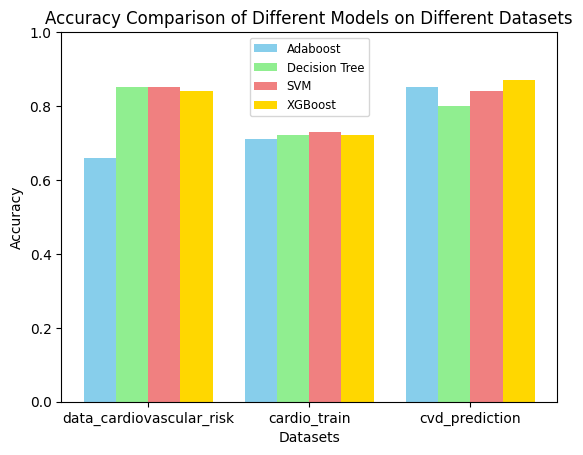

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Actual accuracy data for four models on three datasets
models = ['Adaboost', 'Decision Tree', 'SVM', 'XGBoost']
datasets = ['data_cardiovascular_risk', 'cardio_train', 'cvd_prediction']

accuracies = np.array([
    [0.66, 0.71, 0.85],
    [0.85, 0.72, 0.80],
    [0.85, 0.73, 0.84],
    [0.84, 0.72, 0.87]
])

# Define custom colors for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

# Plotting the grouped bar chart with custom colors
bar_width = 0.2
index = np.arange(len(datasets))

fig, ax = plt.subplots()

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, accuracies[i, :], bar_width, label=model, color=colors[i])

ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Different Models on Different Datasets')
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(datasets)
ax.legend()
ax.set_ylim(0, 1.0)
ax.legend(fontsize='small')
plt.show()


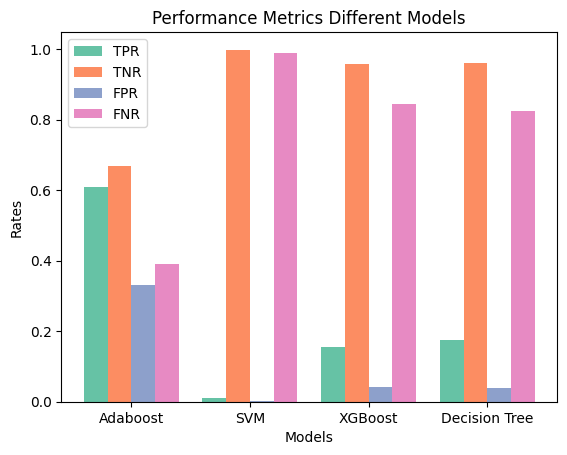

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

conf_matrices = {
    'Adaboost': np.array([[388, 193], [38, 59]]),
    'SVM': np.array([[580, 1], [96, 1]]),
    'XGBoost': np.array([[557, 24], [82, 15]]),
    'Decision Tree': np.array([[558, 23], [80, 17]])
}

# Function to calculate TPR, TNR, FPR, FNR
def calculate_rates(matrix):
    true_positive = matrix[1, 1]
    true_negative = matrix[0, 0]
    false_positive = matrix[0, 1]
    false_negative = matrix[1, 0]

    tpr = true_positive / (true_positive + false_negative)  # True Positive Rate (Sensitivity/Recall)
    tnr = true_negative / (true_negative + false_positive)  # True Negative Rate (Specificity)
    fpr = false_positive / (false_positive + true_negative)  # False Positive Rate
    fnr = false_negative / (false_negative + true_positive)  # False Negative Rate

    return tpr, tnr, fpr, fnr

# Calculate rates for each model
rates = {}
for model, matrix in conf_matrices.items():
    rates[model] = calculate_rates(matrix)

# Extract values
model_names = list(rates.keys())
tpr_values = [rate[0] for rate in rates.values()]
tnr_values = [rate[1] for rate in rates.values()]
fpr_values = [rate[2] for rate in rates.values()]
fnr_values = [rate[3] for rate in rates.values()]

# Visualization with different colors
bar_width = 0.2
index = np.arange(len(model_names))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']    # Change these to your preferred colors

plt.bar(index, tpr_values, width=bar_width, label='TPR', color=colors[0])
plt.bar(index + bar_width, tnr_values, width=bar_width, label='TNR', color=colors[1])
plt.bar(index + 2*bar_width, fpr_values, width=bar_width, label='FPR', color=colors[2])
plt.bar(index + 3*bar_width, fnr_values, width=bar_width, label='FNR', color=colors[3])

plt.xlabel('Models')
plt.ylabel('Rates')
plt.title('Performance Metrics of Different Models')
plt.xticks(index + 1.5*bar_width, model_names)
plt.legend()
plt.show()


In [ ]:
import numpy as np

conf_matrices = {
    'Adaboost': np.array([[388, 193], [38, 59]]),
    'SVM': np.array([[580, 1], [96, 1]]),
    'XGBoost': np.array([[557, 24], [82, 15]]),
    'Decision Tree': np.array([[558, 23], [80, 17]])
}

# Function to calculate TPR, TNR, FPR, FNR
def calculate_rates(matrix):
    true_positive = matrix[1, 1]
    true_negative = matrix[0, 0]
    false_positive = matrix[0, 1]
    false_negative = matrix[1, 0]

    tpr = true_positive / (true_positive + false_negative)  # True Positive Rate (Sensitivity/Recall)
    tnr = true_negative / (true_negative + false_positive)  # True Negative Rate (Specificity)
    fpr = false_positive / (false_positive + true_negative)  # False Positive Rate
    fnr = false_negative / (false_negative + true_positive)  # False Negative Rate

    return tpr, tnr, fpr, fnr

# Calculate rates for each model
rates = {}
for model, matrix in conf_matrices.items():
    rates[model] = calculate_rates(matrix)

# Display rates
for model, (tpr, tnr, fpr, fnr) in rates.items():
    print(f"{model} - TPR: {tpr:.3f}, TNR: {tnr:.3f}, FPR: {fpr:.3f}, FNR: {fnr:.3f}")


Adaboost - TPR: 0.608, TNR: 0.668, FPR: 0.332, FNR: 0.392
SVM - TPR: 0.010, TNR: 0.998, FPR: 0.002, FNR: 0.990
XGBoost - TPR: 0.155, TNR: 0.959, FPR: 0.041, FNR: 0.845
Decision Tree - TPR: 0.175, TNR: 0.960, FPR: 0.040, FNR: 0.825


kartik visualizations

Adaboost - TPR: 0.637, TNR: 0.770, FPR: 0.230, FNR: 0.363
SVM - TPR: 0.703, TNR: 0.761, FPR: 0.239, FNR: 0.297
XGBoost - TPR: 0.662, TNR: 0.777, FPR: 0.223, FNR: 0.338
Decision Tree - TPR: 0.638, TNR: 0.786, FPR: 0.214, FNR: 0.362


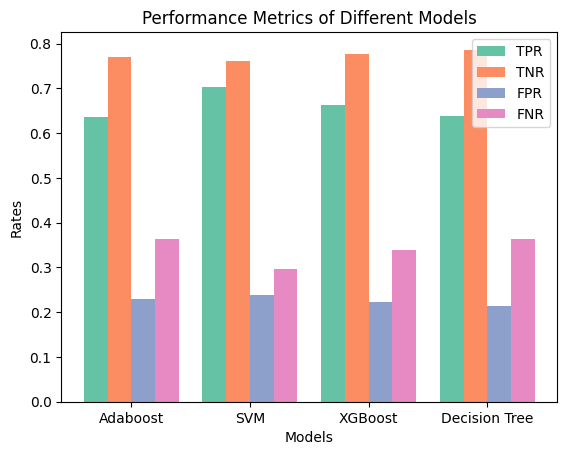

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

conf_matrices = {
    'Adaboost': np.array([[4723, 1408], [2135, 3748]]),
    'SVM': np.array([[5321, 1667],  [2086, 4926]]),
    'XGBoost': np.array([[4782, 1369], [1981, 3882]]),
    'Decision Tree': np.array([[4878, 1326], [2106, 3704]])
}

# Function to calculate TPR, TNR, FPR, FNR
def calculate_rates(matrix):
    true_positive = matrix[1, 1]
    true_negative = matrix[0, 0]
    false_positive = matrix[0, 1]
    false_negative = matrix[1, 0]

    tpr = true_positive / (true_positive + false_negative)  # True Positive Rate (Sensitivity/Recall)
    tnr = true_negative / (true_negative + false_positive)  # True Negative Rate (Specificity)
    fpr = false_positive / (false_positive + true_negative)  # False Positive Rate
    fnr = false_negative / (false_negative + true_positive)  # False Negative Rate

    return tpr, tnr, fpr, fnr

# Calculate rates for each model
rates = {}
for model, matrix in conf_matrices.items():
    rates[model] = calculate_rates(matrix)
for model, (tpr, tnr, fpr, fnr) in rates.items():
    print(f"{model} - TPR: {tpr:.3f}, TNR: {tnr:.3f}, FPR: {fpr:.3f}, FNR: {fnr:.3f}")


# Extract values
model_names = list(rates.keys())
tpr_values = [rate[0] for rate in rates.values()]
tnr_values = [rate[1] for rate in rates.values()]
fpr_values = [rate[2] for rate in rates.values()]
fnr_values = [rate[3] for rate in rates.values()]

# Visualization with different colors
bar_width = 0.2
index = np.arange(len(model_names))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']    # Change these to your preferred colors

plt.bar(index, tpr_values, width=bar_width, label='TPR', color=colors[0])
plt.bar(index + bar_width, tnr_values, width=bar_width, label='TNR', color=colors[1])
plt.bar(index + 2*bar_width, fpr_values, width=bar_width, label='FPR', color=colors[2])
plt.bar(index + 3*bar_width, fnr_values, width=bar_width, label='FNR', color=colors[3])

plt.xlabel('Models')
plt.ylabel('Rates')
plt.title('Performance Metrics of Different Models')
plt.xticks(index + 1.5*bar_width, model_names)
plt.legend()
plt.show()


sanjays visualization

Adaboost - TPR: 0.637, TNR: 0.770, FPR: 0.230, FNR: 0.363
SVM - TPR: 0.822, TNR: 0.870, FPR: 0.130, FNR: 0.178
XGBoost - TPR: 0.832, TNR: 0.870, FPR: 0.130, FNR: 0.168
Decision Tree - TPR: 0.785, TNR: 0.831, FPR: 0.169, FNR: 0.215


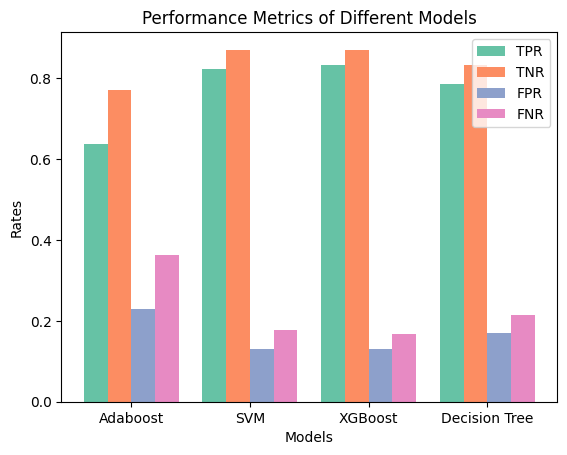

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

conf_matrices = {
    'Adaboost': np.array([[4723, 1408], [2135, 3748]]),
    'SVM': np.array([[67, 10],  [19, 88]]),
    'XGBoost': np.array([[67, 10], [18, 89]]),
    'Decision Tree': np.array([[64, 13], [23, 84]])
}

# Function to calculate TPR, TNR, FPR, FNR
def calculate_rates(matrix):
    true_positive = matrix[1, 1]
    true_negative = matrix[0, 0]
    false_positive = matrix[0, 1]
    false_negative = matrix[1, 0]

    tpr = true_positive / (true_positive + false_negative)  # True Positive Rate (Sensitivity/Recall)
    tnr = true_negative / (true_negative + false_positive)  # True Negative Rate (Specificity)
    fpr = false_positive / (false_positive + true_negative)  # False Positive Rate
    fnr = false_negative / (false_negative + true_positive)  # False Negative Rate

    return tpr, tnr, fpr, fnr

# Calculate rates for each model
rates = {}
for model, matrix in conf_matrices.items():
    rates[model] = calculate_rates(matrix)
for model, (tpr, tnr, fpr, fnr) in rates.items():
    print(f"{model} - TPR: {tpr:.3f}, TNR: {tnr:.3f}, FPR: {fpr:.3f}, FNR: {fnr:.3f}")


# Extract values
model_names = list(rates.keys())
tpr_values = [rate[0] for rate in rates.values()]
tnr_values = [rate[1] for rate in rates.values()]
fpr_values = [rate[2] for rate in rates.values()]
fnr_values = [rate[3] for rate in rates.values()]

# Visualization with different colors
bar_width = 0.2
index = np.arange(len(model_names))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']    # Change these to your preferred colors

plt.bar(index, tpr_values, width=bar_width, label='TPR', color=colors[0])
plt.bar(index + bar_width, tnr_values, width=bar_width, label='TNR', color=colors[1])
plt.bar(index + 2*bar_width, fpr_values, width=bar_width, label='FPR', color=colors[2])
plt.bar(index + 3*bar_width, fnr_values, width=bar_width, label='FNR', color=colors[3])

plt.xlabel('Models')
plt.ylabel('Rates')
plt.title('Performance Metrics of Different Models')
plt.xticks(index + 1.5*bar_width, model_names)
plt.legend()
plt.show()
